In [1]:
import numpy as np
from collections import Counter

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


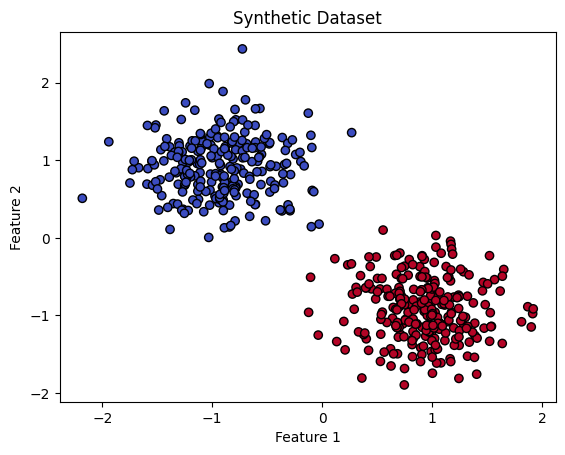

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Dataset")
plt.show()


In [16]:
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=2,
    cluster_std=3.0,   
    random_state=42
)


In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


In [20]:
class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]
        return Counter(k_labels).most_common(1)[0][0]


In [21]:
class SVM:
    def __init__(self, lr=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters

    def fit(self, X, y):
        y = np.where(y == 0, -1, 1)

        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - y[idx] * x_i)
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.where(linear_output >= 0, 1, 0)


In [22]:
knn = KNN(k=7)
knn.fit(X_train, y_train)

svm = SVM()
svm.fit(X_train, y_train)


In [23]:
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)


In [25]:
print("KNN Accuracy :", accuracy_score(y_test, knn_pred))
print("SVM Accuracy :", accuracy_score(y_test, svm_pred))

print("\nKNN Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))


KNN Accuracy : 0.99
SVM Accuracy : 0.98

KNN Confusion Matrix:
 [[45  0]
 [ 1 54]]

SVM Confusion Matrix:
 [[45  0]
 [ 2 53]]
